# 用 Python 学习数字图像处理

## 4. 图像的绘制
参考：[python数字图像处理（5）：图像的绘制](http://www.cnblogs.com/denny402/p/5122594.html)

In [1]:
import matplotlib.pyplot as plt
from skimage import io, data

%matplotlib inline

前面已经学习了利用 `io.imshow(img)` 来绘制图像。这一句代码的实质是利用 `matplotlib` 包绘制图像，绘制成功后，返回一个 `matplotlib` 类型的对象。因此，我们也可以这样写：
```python
import matplotlib.pyplot as plt
plt.imshow(img)
```

`imshow()`函数的格式为
```python
matplotlib.pyplot.imshow(X, cmap=None)
```
其中 `X` 是要绘制的图像或数组；`cmap` 是“colormap”，意思是颜色图谱，默认绘制的是 RGB 颜色空间。需要注意，当要绘制的图像或数组通道数为 3 时，`cmap`将被忽略。[[1]](https://stackoverflow.com/questions/46739739/why-does-plt-imshowim-cmap-gray-not-show-a-grayscale-image)

其他可选的颜色图谱如下表所示：
<table class="docutils" style="height: 422px; width: 300px;" border="1"><colgroup><col width="20%" /><col width="80%" /></colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">颜色图谱</th><th class="head">描述</th></tr>
</thead>
<tbody valign="top">
<tr class="row-even">
<td>autumn</td>
<td>红-橙-黄</td>
</tr>
<tr class="row-odd">
<td>bone</td>
<td>黑-白，x线</td>
</tr>
<tr class="row-even">
<td>cool</td>
<td>青-洋红</td>
</tr>
<tr class="row-odd">
<td>copper</td>
<td>黑-铜</td>
</tr>
<tr class="row-even">
<td>flag</td>
<td>红-白-蓝-黑</td>
</tr>
<tr class="row-odd">
<td>gray</td>
<td>黑-白</td>
</tr>
<tr class="row-even">
<td>hot</td>
<td>黑-红-黄-白</td>
</tr>
<tr class="row-odd">
<td>hsv</td>
<td>hsv颜色空间， 红-黄-绿-青-蓝-洋红-红</td>
</tr>
<tr class="row-even">
<td>inferno</td>
<td>黑-红-黄</td>
</tr>
<tr class="row-odd">
<td>jet</td>
<td>蓝-青-黄-红<a id="id1" class="footnote-reference" href="http://matplotlib.org/api/pyplot_summary.html#id6"><br /></a></td>
</tr>
<tr class="row-even">
<td>magma</td>
<td>黑-红-白</td>
</tr>
<tr class="row-odd">
<td>pink</td>
<td>黑-粉-白</td>
</tr>
<tr class="row-even">
<td>plasma</td>
<td>绿-红-黄</td>
</tr>
<tr class="row-odd">
<td>prism</td>
<td>&nbsp;红-黄-绿-蓝-紫-...-绿模式</td>
</tr>
<tr class="row-even">
<td>spring</td>
<td>洋红-黄</td>
</tr>
<tr class="row-odd">
<td>summer</td>
<td>绿-黄</td>
</tr>
<tr class="row-even">
<td>viridis</td>
<td>蓝-绿-黄</td>
</tr>
<tr class="row-odd">
<td>winter</td>
<td>蓝-绿</td>
</tr>
</tbody>
</table>

用的比较多的有 `gray`、`jet` 等。如：

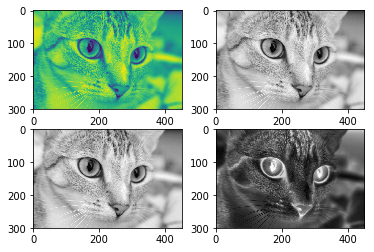

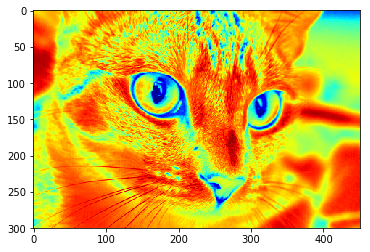

In [2]:
img = data.chelsea()
# Check if `img` have three channels
# If yes, get the first channel only
if img.ndim == 3:
    img = img[:,:,0]

plt.subplot(221); plt.imshow(img)
plt.subplot(222); plt.imshow(img, cmap ='gray')
plt.subplot(223); plt.imshow(img, cmap = plt.cm.gray)
plt.subplot(224); plt.imshow(img, cmap = plt.cm.gray_r)
plt.show()
plt.imshow(img, cmap=plt.cm.jet)
plt.show()

`matplotlib` 是一个专业绘图库，相当于 MATLAB 中的 `plot`。在绘图时可以设置多个 `figure` 窗口，设置 `figure` 的标题，隐藏坐标尺，还可以使用 `subplot` 在一个 `figure` 中绘制多张图像。

**例1：** 用 `figure` 函数和 `subplot` 函数分别创建主窗口与子图

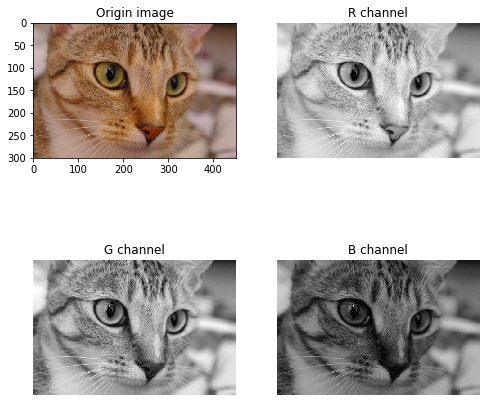

In [3]:
# Load the image
img = data.chelsea()

# Create a new figure with num='chelsea', figsize=(8, 8)
# If a figure with num='chelsea' already exists, make it active
# and returns a reference to it, otherwise create it and return it.
# figsize is a tuple of integers, indicates the width, height in inches
plt.figure(num='chelsea', figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.title('Origin image')
plt.imshow(img)

plt.subplot(2, 2, 2)
plt.title('R channel')
plt.imshow(img[:, :, 0], plt.cm.gray)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('G channel')
plt.imshow(img[:, :, 1], plt.cm.gray)
plt.axis('off')

plt.subplot(224)
plt.title('B channel')
plt.imshow(img[:, :, 2], plt.cm.gray)
plt.axis('off')

plt.show()

在图片的绘制过程中，我们用 `matplotlib.pyplot` 模块下的 `figure()` 函数来创建显示窗口，该函数的格式为：
```python
matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None）
```
所有参数都是可选的，都有默认值，因此调用该函数时可以不带任何参数，其中：
- `num`: 整型或者字符串都行。如果调用时不提供该参数，在新的 `figure` 被创建的时候，`figure` 的计数会自动累加。提供该参数时，如果 `num` 值对应的已经存在，则返回对应的 `figure`；否则创建一个新的 `figure`。
- `figsize`: 设置窗口大小，`tuple`　类型的整数 `(width, height)`，单位是英寸。
- `dpi`: 整型数字，表示窗口的分辨率。
- `facecolor`: 窗口的背景颜色。
- `edgecolor`: 窗口的边框颜色。

用 `figure()` 函数创建的窗口，只能显示一幅图像，如果想要显示多幅图像，则需要将这个窗口再划分为几个子图，在每个子图中显示不同的图像。可以使用 `subplot()` 函数来划分子图，函数格式为：
```python
matplotlib.pyplot.subplot(nrows, ncols, plot_number)
```
- `nrows`: 子图的行数。
- `ncols`: 子图的列数。
- `plot_number`: 当前子图的编号。

如 `plt.subplot(2, 2, 1)` 或　`plt.subplot(221)`，两种写法效果一样。

**例２：** 用 `figure` 函数和 `add_subplot` 函数分别创建主窗口与子图

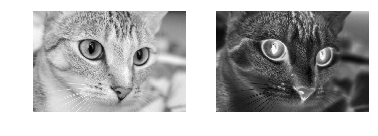

In [4]:
# Load the image
img = data.chelsea()

# Create a figure
fig = plt.figure()

# Add subplot to figure
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.imshow(img[:, :, 0], cmap=plt.cm.gray)

ax2 = fig.add_subplot(1, 2, 2)
ax2.axis('off')
ax2.imshow(img[:, :, 0], cmap=plt.cm.gray_r)

plt.show()

**例3：** 用 `subplots` 函数分别创建主窗口与划分子图

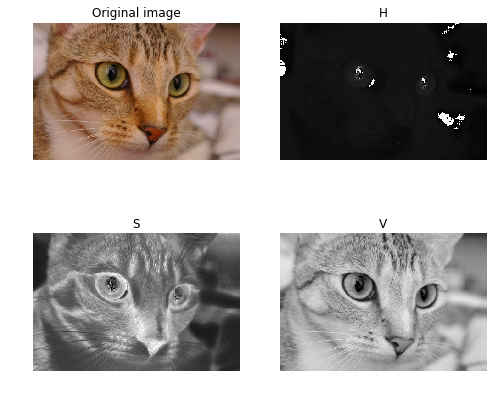

In [5]:
from skimage import color

# Load the image
img_rgb = data.chelsea()

# Convert RGB to HSV
img_hsv = color.rgb2hsv(img_rgb)

fig, axes = plt.subplots(2, 2, figsize=(7, 6))
ax0, ax1, ax2, ax3 = axes.ravel()

ax0.imshow(img_rgb)
ax0.set_title('Original image')

ax1.imshow(img_hsv[:, :, 0], cmap=plt.cm.gray)
ax1.set_title('H')

ax2.imshow(img_hsv[:, :, 1], cmap=plt.cm.gray)
ax2.set_title('S')

ax3.imshow(img_hsv[:, :, 2], cmap=plt.cm.gray)
ax3.set_title('V')

# Turn off the axis
for ax in axes.ravel():
    ax.axis('off')

# Automatically adjusts subplot params so that the subplot(s)
# fits in to the figure area.
fig.tight_layout()
plt.show()

直接用 `subplots()` 函数来创建并划分窗口：
```python
matplotlib.pyplot.subplots(nrows=1, ncols=1)
```
- `nrows`: 所有子图行数，默认为１。
- `ncols`: 所有子图列数，默认为１。
返回一个窗口 `figure` 和一个 `tuple` 型的 `ax` 对象，该对象包含所有的子图，可以结合 `ravel()` 函数列出所有的子图。

如果有多个子图，我们还可以使用 `tight_layout()` 函数来调整显示的布局：
```python
matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
```
- `pad`: 主窗口边缘和子图边缘间的间距，默认为1.08。
- `h_pad, w_pad`: 子图边缘之间的间距，默认为 `pad_inches`。
- `rect`: 一个矩形区域，如果设置这个值，则将所有的子图调整到这个矩形区域内。

除了使用 `matplotlib` 库来绘制图像，`skimage` 还有另一个子模块 `viewer`，也提供了一个函数来显示图像。不同的是，它利用 Qt 工具来创建一块画布，从而在画布上绘制图像。

**例4：** 用 `ImageViewer` 绘图

In [6]:
from skimage.viewer import ImageViewer

# Load the image
img = data.coins()
viewer = ImageViewer(img)
viewer.show()

/home/duang/anaconda3/lib/python3.6/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


[]

最后总结一下，绘制和显示图像常用的函数有：
<table style="height: 242px; width: 508px;" border="0">
<colgroup><col width="12%" /><col width="40%" /><col width="48%" /></colgroup>
<tbody>
<tr>
<td>函数名</td>
<td>功能</td>
<td>调用格式</td>
</tr>
<tr>
<td>figure</td>
<td>创建一个显示窗口</td>
<td>plt.figure(num=1,figsize=(8,8)</td>
</tr>
<tr>
<td>imshow</td>
<td>绘制图片</td>
<td>plt.imshow(image)</td>
</tr>
<tr>
<td>show</td>
<td>显示窗口</td>
<td>plt.show()</td>
</tr>
<tr>
<td>subplot</td>
<td>划分子图</td>
<td>plt.subplot(2,2,1)</td>
</tr>
<tr>
<td>title</td>
<td>设置子图标题(与subplot结合使用）</td>
<td>plt.title('origin image')</td>
</tr>
<tr>
<td>axis</td>
<td>是否显示坐标尺</td>
<td>plt.axis('off')</td>
</tr>
<tr>
<td>subplots</td>
<td>创建带有多个子图的窗口</td>
<td>fig,axes=plt.subplots(2,2,figsize=(8,8))</td>
</tr>
<tr>
<td>ravel</td>
<td>为每个子图设置变量</td>
<td>ax0,ax1,ax2,ax3=axes.ravel()</td>
</tr>
<tr>
<td>set_title</td>
<td>设置子图标题（与axes结合使用）</td>
<td>ax0.set_title('first window')</td>
</tr>
<tr>
<td>tight_layout</td>
<td>自动调整子图显示布局</td>
<td>plt.tight_layout()</td>
</tr>
</tbody>
</table>